In [1]:
# Import necessary libraries
import sys
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader
import mlflow
from sklearn.preprocessing import StandardScaler

# Append parent directory to system path
sys.path.append('..')
from src.deep_learning_models import (
    FraudDataset,
    MLPModel,
    CNNModel,
    RNNModel,
    LSTMModel,
    train_evaluate_dl_model,
    prepare_sequence_data
)

In [2]:
# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)

In [3]:
# Load the prepared datasets
print("Loading prepared datasets...")
train_data = pd.read_csv('../data/processed/train_data.csv')
display(train_data.head())
test_data = pd.read_csv('../data/processed/test_data.csv')
display(test_data.head())


Loading prepared datasets...


,user_id,purchase_value,age,ip_address,time_diff,ip_int,hour_of_day,day_of_week,is_weekend,month,...,user_std_purchase,user_max_purchase,user_min_purchase,user_time_range_days,tx_velocity,source_encoded,browser_encoded,sex_encoded,country_encoded,class
0,306367,0.167258,0.331793,7.195639e+08,132.950833,719563902,5,3,0,7,...,NaN,0.167258,0.167258,0.0,0.0,0,0,0,36,0
1,349918,-0.651398,-0.248408,3.796264e+09,2474.670278,3796264016,16,1,0,6,...,NaN,-0.651398,-0.651398,0.0,0.0,1,2,1,181,0
2,252150,0.549298,0.911994,4.106204e+09,2214.139444,4106203903,9,1,0,4,...,NaN,0.549298,0.549298,0.0,0.0,0,2,1,181,0
3,127539,2.677805,1.028034,6.139430e+08,852.813611,613943026,20,3,0,2,...,NaN,2.677805,2.677805,0.0,0.0,1,1,1,36,0
4,257348,0.167258,1.028034,1.763565e+08,210.768889,176356458,12,0,0,7,...,NaN,0.167258,0.167258,0.0,0.0,2,4,1,181,0


,user_id,purchase_value,age,ip_address,time_diff,ip_int,hour_of_day,day_of_week,is_weekend,month,...,user_std_purchase,user_max_purchase,user_min_purchase,user_time_range_days,tx_velocity,source_encoded,browser_encoded,sex_encoded,country_encoded,class
0,171751,0.385567,0.563874,3.961405e+09,2682.805278,3961404649,10,2,0,9,...,NaN,0.385567,0.385567,0.0,0.0,0,3,1,181,0
1,43967,0.494721,0.447833,3.150281e+09,2839.298056,3150281030,5,4,0,9,...,NaN,0.494721,0.494721,0.0,0.0,2,3,1,107,0
2,218957,-0.269358,0.331793,2.035115e+07,1428.988333,20351151,18,1,0,7,...,NaN,-0.269358,-0.269358,0.0,0.0,0,0,0,176,1
3,377211,-0.651398,-0.944649,3.568979e+09,1747.151389,3568979293,11,0,0,5,...,NaN,-0.651398,-0.651398,0.0,0.0,2,1,1,8,0
4,225557,0.658452,1.028034,4.971851e+08,2717.191111,497185119,11,1,0,9,...,NaN,0.658452,0.658452,0.0,0.0,1,0,1,171,0


In [4]:
# Separate features and target
X_train = train_data.drop('class', axis=1)
y_train = train_data['class']
X_test = test_data.drop('class', axis=1)
y_test = test_data['class']

In [5]:
# Handle missing values and select numeric columns
numeric_columns = X_train.select_dtypes(include=[np.number]).columns
X_train = X_train[numeric_columns]
X_test = X_test[numeric_columns]

# Drop problematic columns
X_train = X_train.drop('user_std_purchase', axis=1)
X_test = X_test.drop('user_std_purchase', axis=1)


In [6]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
# Create PyTorch datasets
train_dataset = FraudDataset(X_train_scaled, y_train.values)
test_dataset = FraudDataset(X_test_scaled, y_test.values)


In [8]:
# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)


In [9]:
# Initialize MLflow
mlflow.set_experiment("fraud_detection_deep_learning")

<Experiment: artifact_location='file:///c:/Users/hp/Documents/FraudDetectionAI/notebooks/mlruns/109339242288360001', creation_time=1739899030143, experiment_id='109339242288360001', last_update_time=1739899030143, lifecycle_stage='active', name='fraud_detection_deep_learning', tags={}>

In [10]:
# Define model parameters
input_dim = X_train.shape[1]
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")


Using device: cpu


In [11]:
# Initialize and train MLP model
print("\nTraining MLP model...")
mlp_model = MLPModel(input_dim=input_dim)
mlp_results = train_evaluate_dl_model(
    mlp_model, "mlp", train_loader, test_loader
)


Training MLP model...
Epoch 1/100 - Loss: 0.2591 - Val AUC: 0.7619
Epoch 2/100 - Loss: 0.2348 - Val AUC: 0.7579
Epoch 3/100 - Loss: 0.2235 - Val AUC: 0.7633
Epoch 4/100 - Loss: 0.2189 - Val AUC: 0.7596
Epoch 5/100 - Loss: 0.2163 - Val AUC: 0.7610
Epoch 6/100 - Loss: 0.2147 - Val AUC: 0.7635
Epoch 7/100 - Loss: 0.2141 - Val AUC: 0.7653
Epoch 8/100 - Loss: 0.2134 - Val AUC: 0.7624
Epoch 9/100 - Loss: 0.2126 - Val AUC: 0.7645
Epoch 10/100 - Loss: 0.2121 - Val AUC: 0.7658
Epoch 11/100 - Loss: 0.2142 - Val AUC: 0.7605
Epoch 12/100 - Loss: 0.2121 - Val AUC: 0.7644
Epoch 13/100 - Loss: 0.2113 - Val AUC: 0.7631
Epoch 14/100 - Loss: 0.2126 - Val AUC: 0.7625
Epoch 15/100 - Loss: 0.2122 - Val AUC: 0.7622
Epoch 16/100 - Loss: 0.2111 - Val AUC: 0.7651
Epoch 17/100 - Loss: 0.2102 - Val AUC: 0.7639
Epoch 18/100 - Loss: 0.2104 - Val AUC: 0.7624
Epoch 19/100 - Loss: 0.2119 - Val AUC: 0.7642
Epoch 20/100 - Loss: 0.2105 - Val AUC: 0.7637
Early stopping triggered


In [12]:
# Prepare sequential data for CNN/RNN/LSTM
timesteps = 5  # You can adjust this
X_train_seq = prepare_sequence_data(X_train_scaled, timesteps)
X_test_seq = prepare_sequence_data(X_test_scaled, timesteps)
y_train_seq = y_train.values[timesteps-1:]
y_test_seq = y_test.values[timesteps-1:]

In [18]:
# Reshape data for CNN (batch_size, channels, sequence_length)
# Transpose to get the correct channel dimension
X_train_seq_cnn = X_train_seq.transpose(0, 2, 1)
X_test_seq_cnn = X_test_seq.transpose(0, 2, 1)

In [19]:
# Create separate datasets for CNN and RNN/LSTM
train_seq_dataset_cnn = FraudDataset(X_train_seq_cnn, y_train_seq)
test_seq_dataset_cnn = FraudDataset(X_test_seq_cnn, y_test_seq)
train_seq_dataset_rnn = FraudDataset(X_train_seq, y_train_seq)
test_seq_dataset_rnn = FraudDataset(X_test_seq, y_test_seq)


In [20]:
# Create separate data loaders
train_seq_loader_cnn = DataLoader(train_seq_dataset_cnn, batch_size=batch_size, shuffle=True)
test_seq_loader_cnn = DataLoader(test_seq_dataset_cnn, batch_size=batch_size)
train_seq_loader_rnn = DataLoader(train_seq_dataset_rnn, batch_size=batch_size, shuffle=True)
test_seq_loader_rnn = DataLoader(test_seq_dataset_rnn, batch_size=batch_size)


In [21]:
# Initialize and train CNN model
print("\nTraining CNN model...")
cnn_model = CNNModel(input_shape=(timesteps, input_dim))  # timesteps will be the number of input channels
cnn_results = train_evaluate_dl_model(
    cnn_model, "cnn", train_seq_loader_cnn, test_seq_loader_cnn
)


Training CNN model...
Epoch 1/100 - Loss: 0.2342 - Val AUC: 0.7685
Epoch 2/100 - Loss: 0.2099 - Val AUC: 0.7632
Epoch 3/100 - Loss: 0.2049 - Val AUC: 0.7628
Epoch 4/100 - Loss: 0.2010 - Val AUC: 0.7640
Epoch 5/100 - Loss: 0.1990 - Val AUC: 0.7608
Epoch 6/100 - Loss: 0.1965 - Val AUC: 0.7619
Epoch 7/100 - Loss: 0.1956 - Val AUC: 0.7624
Epoch 8/100 - Loss: 0.1937 - Val AUC: 0.7596
Epoch 9/100 - Loss: 0.1923 - Val AUC: 0.7623
Epoch 10/100 - Loss: 0.1917 - Val AUC: 0.7672
Epoch 11/100 - Loss: 0.1897 - Val AUC: 0.7632
Early stopping triggered


In [22]:
# Initialize and train RNN model
print("\nTraining RNN model...")
rnn_model = RNNModel(input_shape=(timesteps, input_dim))  # Remove batch_size from input_shape
rnn_results = train_evaluate_dl_model(
    rnn_model, "rnn", train_seq_loader_rnn, test_seq_loader_rnn
)



Training RNN model...
Epoch 1/100 - Loss: 0.2162 - Val AUC: 0.7688
Epoch 2/100 - Loss: 0.1973 - Val AUC: 0.7611
Epoch 3/100 - Loss: 0.1950 - Val AUC: 0.7620
Epoch 4/100 - Loss: 0.1941 - Val AUC: 0.7612
Epoch 5/100 - Loss: 0.1929 - Val AUC: 0.7675
Epoch 6/100 - Loss: 0.1921 - Val AUC: 0.7658
Epoch 7/100 - Loss: 0.1911 - Val AUC: 0.7643
Epoch 8/100 - Loss: 0.1912 - Val AUC: 0.7629
Epoch 9/100 - Loss: 0.1904 - Val AUC: 0.7665
Epoch 10/100 - Loss: 0.1891 - Val AUC: 0.7635
Epoch 11/100 - Loss: 0.1897 - Val AUC: 0.7659
Early stopping triggered


In [24]:
# Initialize and train LSTM model
from src.deep_learning_models import LSTMModel
print("\nTraining LSTM model...")
lstm_model = LSTMModel(input_shape=(timesteps, input_dim))  # Remove batch_size from input_shape
lstm_results = train_evaluate_dl_model(
    lstm_model, "lstm", train_seq_loader_rnn, test_seq_loader_rnn
)


Training LSTM model...
Epoch 1/100 - Loss: 0.2141 - Val AUC: 0.7683
Epoch 2/100 - Loss: 0.1952 - Val AUC: 0.7647
Epoch 3/100 - Loss: 0.1925 - Val AUC: 0.7663
Epoch 4/100 - Loss: 0.1913 - Val AUC: 0.7636
Epoch 5/100 - Loss: 0.1903 - Val AUC: 0.7606
Epoch 6/100 - Loss: 0.1891 - Val AUC: 0.7576
Epoch 7/100 - Loss: 0.1882 - Val AUC: 0.7607
Epoch 8/100 - Loss: 0.1878 - Val AUC: 0.7642
Epoch 9/100 - Loss: 0.1873 - Val AUC: 0.7666
Epoch 10/100 - Loss: 0.1860 - Val AUC: 0.7615
Epoch 11/100 - Loss: 0.1858 - Val AUC: 0.7634
Early stopping triggered


In [25]:
# Compare model performances
models_dl = {
    'MLP': mlp_results[1],
    'CNN': cnn_results[1],
    'RNN': rnn_results[1],
    'LSTM': lstm_results[1]
}

print("\nDeep Learning Model Performance Comparison:")
for name, auc in models_dl.items():
    print(f"{name}: AUC = {auc:.4f}")


Deep Learning Model Performance Comparison:
MLP: AUC = 0.7658
CNN: AUC = 0.7685
RNN: AUC = 0.7688
LSTM: AUC = 0.7683


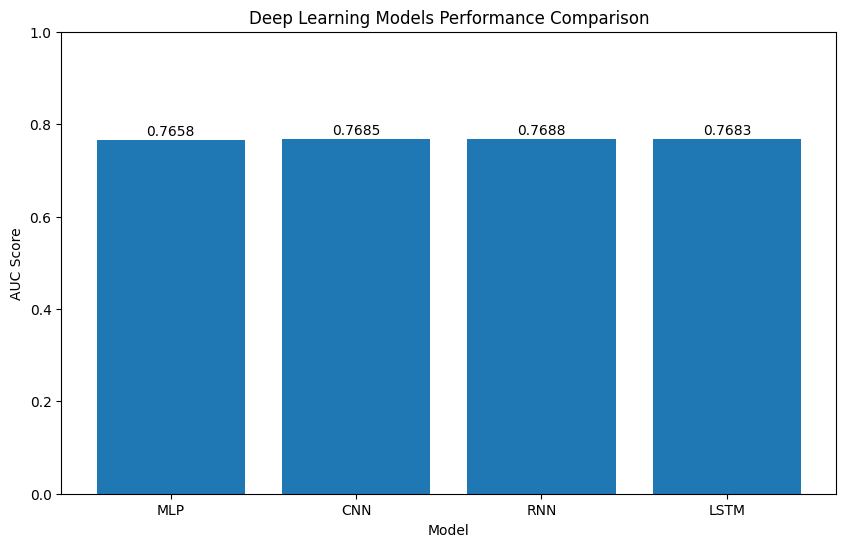

In [27]:
# Plot comparison
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(models_dl.keys(), models_dl.values())
plt.title('Deep Learning Models Performance Comparison')
plt.xlabel('Model')
plt.ylabel('AUC Score')
plt.ylim(0, 1)
for i, v in enumerate(models_dl.values()):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
plt.savefig('../models/deep_learning_comparison.png')
plt.show()
plt.close()

In [28]:
# Save the best deep learning model
best_model_name = max(models_dl.items(), key=lambda x: x[1])[0]
best_auc = models_dl[best_model_name]
print(f"\nBest performing deep learning model: {best_model_name}")
print(f"Best AUC score: {best_auc:.4f}")


Best performing deep learning model: RNN
Best AUC score: 0.7688
